In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

warnings.filterwarnings('ignore')
%matplotlib inline

### Loading the dataset

In [2]:
data = pd.read_excel("glass.xlsx", sheet_name= 'glass')

### Independent and Dependent split

In [6]:
def indepebdentDependentSplit(data,target):
    X = data.drop(target, axis= 1)
    y = data[target]
    
    return X, y

In [7]:
X , y = indepebdentDependentSplit(data= data,
                                  target= "Type")

In [8]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [9]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

### Train Test Split

In [10]:
from sklearn.model_selection import train_test_split 

In [11]:
def split_data(data, target, test_size=0.2, random_state=42):
    """Split the dataset into train and test sets."""
    X = data.drop(columns=[target])
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test


In [12]:
X_train, X_test, y_train, y_test = split_data(data= data,
                                              target= 'Type')

In [13]:
X_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
79,1.51590,12.82,3.52,1.90,72.86,0.69,7.97,0.00,0.00
161,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24
109,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.00,0.00
127,1.52081,13.78,2.28,1.43,71.99,0.49,9.85,0.00,0.17
95,1.51860,13.36,3.43,1.43,72.26,0.51,8.60,0.00,0.00
...,...,...,...,...,...,...,...,...,...
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
14,1.51763,12.61,3.59,1.31,73.29,0.58,8.50,0.00,0.00
92,1.51588,13.12,3.41,1.58,73.26,0.07,8.39,0.00,0.19
179,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.00,0.00


In [14]:
X_test

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11
197,1.51727,14.70,0.00,2.34,73.28,0.00,8.95,0.66,0.00
66,1.52152,13.05,3.65,0.87,72.22,0.19,9.85,0.00,0.17
191,1.51602,14.85,0.00,2.38,73.28,0.00,8.76,0.64,0.09
117,1.51708,13.72,3.68,1.81,72.06,0.64,7.88,0.00,0.00
111,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.00,0.00
15,1.51761,12.81,3.54,1.23,73.24,0.58,8.39,0.00,0.00
86,1.51569,13.24,3.49,1.47,73.25,0.38,8.03,0.00,0.00
75,1.51590,13.02,3.58,1.51,73.12,0.69,7.96,0.00,0.00
144,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24


In [15]:
y_train

79     2
161    3
109    2
127    2
95     2
      ..
106    2
14     1
92     2
179    6
102    2
Name: Type, Length: 171, dtype: int64

In [16]:
y_test

9      1
197    7
66     1
191    7
117    2
111    2
15     1
86     2
75     2
144    2
182    6
170    5
141    2
73     2
178    6
167    5
190    7
18     1
45     1
184    6
98     2
209    7
211    7
195    7
148    3
104    2
30     1
25     1
175    5
16     1
55     1
138    2
158    3
93     2
69     1
203    7
171    5
152    3
97     2
84     2
101    2
200    7
60     1
Name: Type, dtype: int64

### Model Training

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
def train_random_forest(X_train, y_train, n_estimators=100, random_state=42):
    """Train a Random Forest Classifier."""
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
    model.fit(X_train, y_train)
    return model

In [19]:
model = train_random_forest(X_train= X_train,
                            y_train= y_train)

In [20]:
model

RandomForestClassifier(random_state=42)

### Model Evaluation

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [22]:
def evaluate_model(model, X_test, y_test):
    """Evaluate the model using accuracy, precision, recall, and F1-score."""
    y_pred = model.predict(X_test)
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    }
    return metrics, classification_report(y_test, y_pred)

In [23]:
metrics , report = evaluate_model(model= model,
                                  X_test= X_test,
                                  y_test= y_test)

In [24]:
metrics

{'Accuracy': 0.8372093023255814,
 'Precision': 0.866828165374677,
 'Recall': 0.8372093023255814,
 'F1 Score': 0.8330452594474481}

In [26]:
print(report)

              precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.90      0.64      0.75        14
           3       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.84      0.86        43
weighted avg       0.87      0.84      0.83        43



### Tree plot

In [27]:
from sklearn.tree import plot_tree

In [36]:
def plot_decision_tree(model, feature_names, class_names, tree_index=0, figsize=(25, 15), max_depth=None):
    """Plot a single decision tree from a Random Forest model with layout adjustments."""
    plt.figure(figsize=figsize)
    estimator = model.estimators_[tree_index]
    
    plot_tree(
        estimator,
        feature_names=feature_names,
        class_names=class_names,
        filled=True,
        rounded=True,
        fontsize=12,  
        max_depth=max_depth
    )
    plt.title(f"Decision Tree {tree_index} from Random Forest (Max Depth: {max_depth})", fontsize=18)
    plt.tight_layout() 
    plt.show()

In [37]:
class_names=[str(cls) for cls in sorted(data['Type'].unique())]


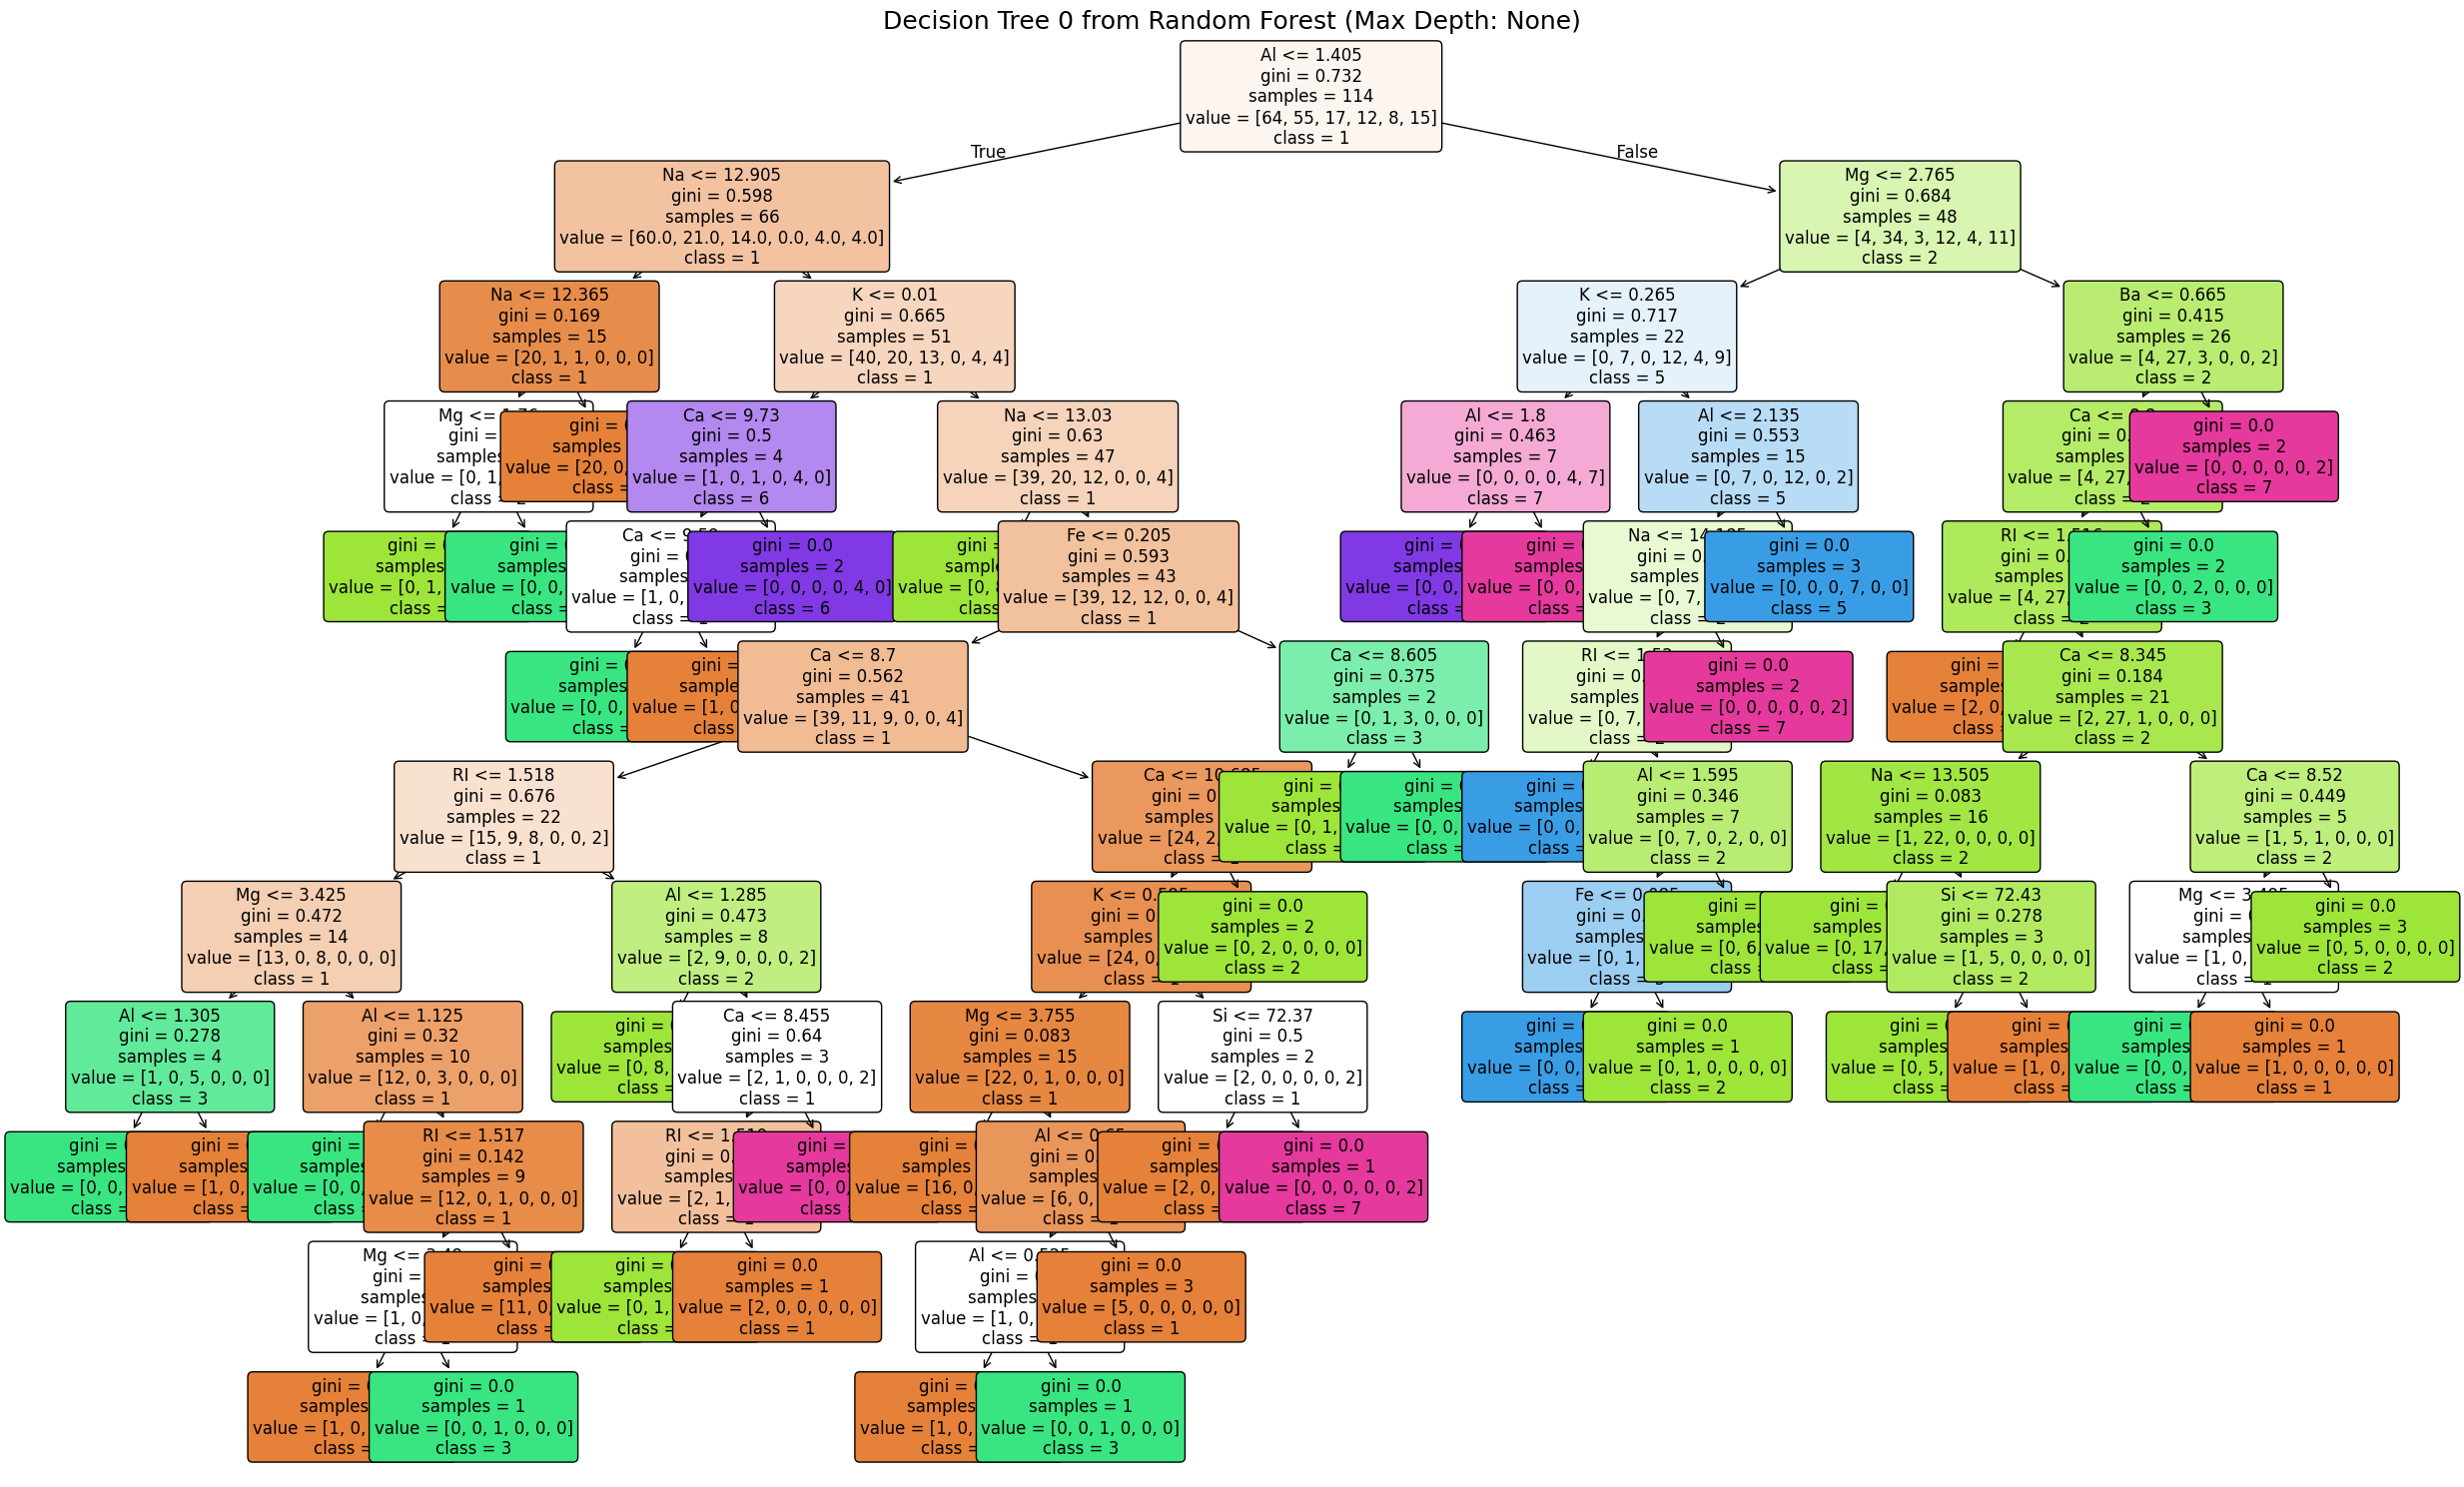

In [38]:
plot_decision_tree(model= model, 
                   feature_names = X.columns, 
                   class_names= class_names)

- this is kind of complex
- prone to overfitting
- will use parameter tunning

### Hyper parameter Tunning

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
def hyperparameter_tuning(X_train, y_train, param_grid=None, cv=5, scoring='accuracy', verbose=1):
    """
    Perform hyperparameter tuning using GridSearchCV for a Random Forest Classifier.
    
    Parameters:
    - X_train: Training features
    - y_train: Training labels
    - param_grid: Dictionary of hyperparameters to tune
    - cv: Number of cross-validation folds
    - scoring: Metric to optimize
    - verbose: Level of verbosity
    
    Returns:
    - best_model: Trained Random Forest model with best hyperparameters
    - best_params: Best hyperparameters
    - best_score: Best cross-validation score
    """
    if param_grid is None:
        # Default hyperparameters to tune
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2'],
            'criterion' : ["gini", "entropy", "log_loss"]
        }
    
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, scoring=scoring, verbose=verbose, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    print("Best Parameters:", best_params)
    print("Best Cross-Validation Score:", best_score)
    
    return best_model, best_params, best_score

In [42]:
best_model, best_params, best_score = hyperparameter_tuning(X_train= X_train,
                      y_train= y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score: 0.7489075630252101


In [54]:
best_params

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [43]:
best_model

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       random_state=42)

In [49]:
best_model.fit(X= X_train,
               y= y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       random_state=42)

### Decision Tree Plot

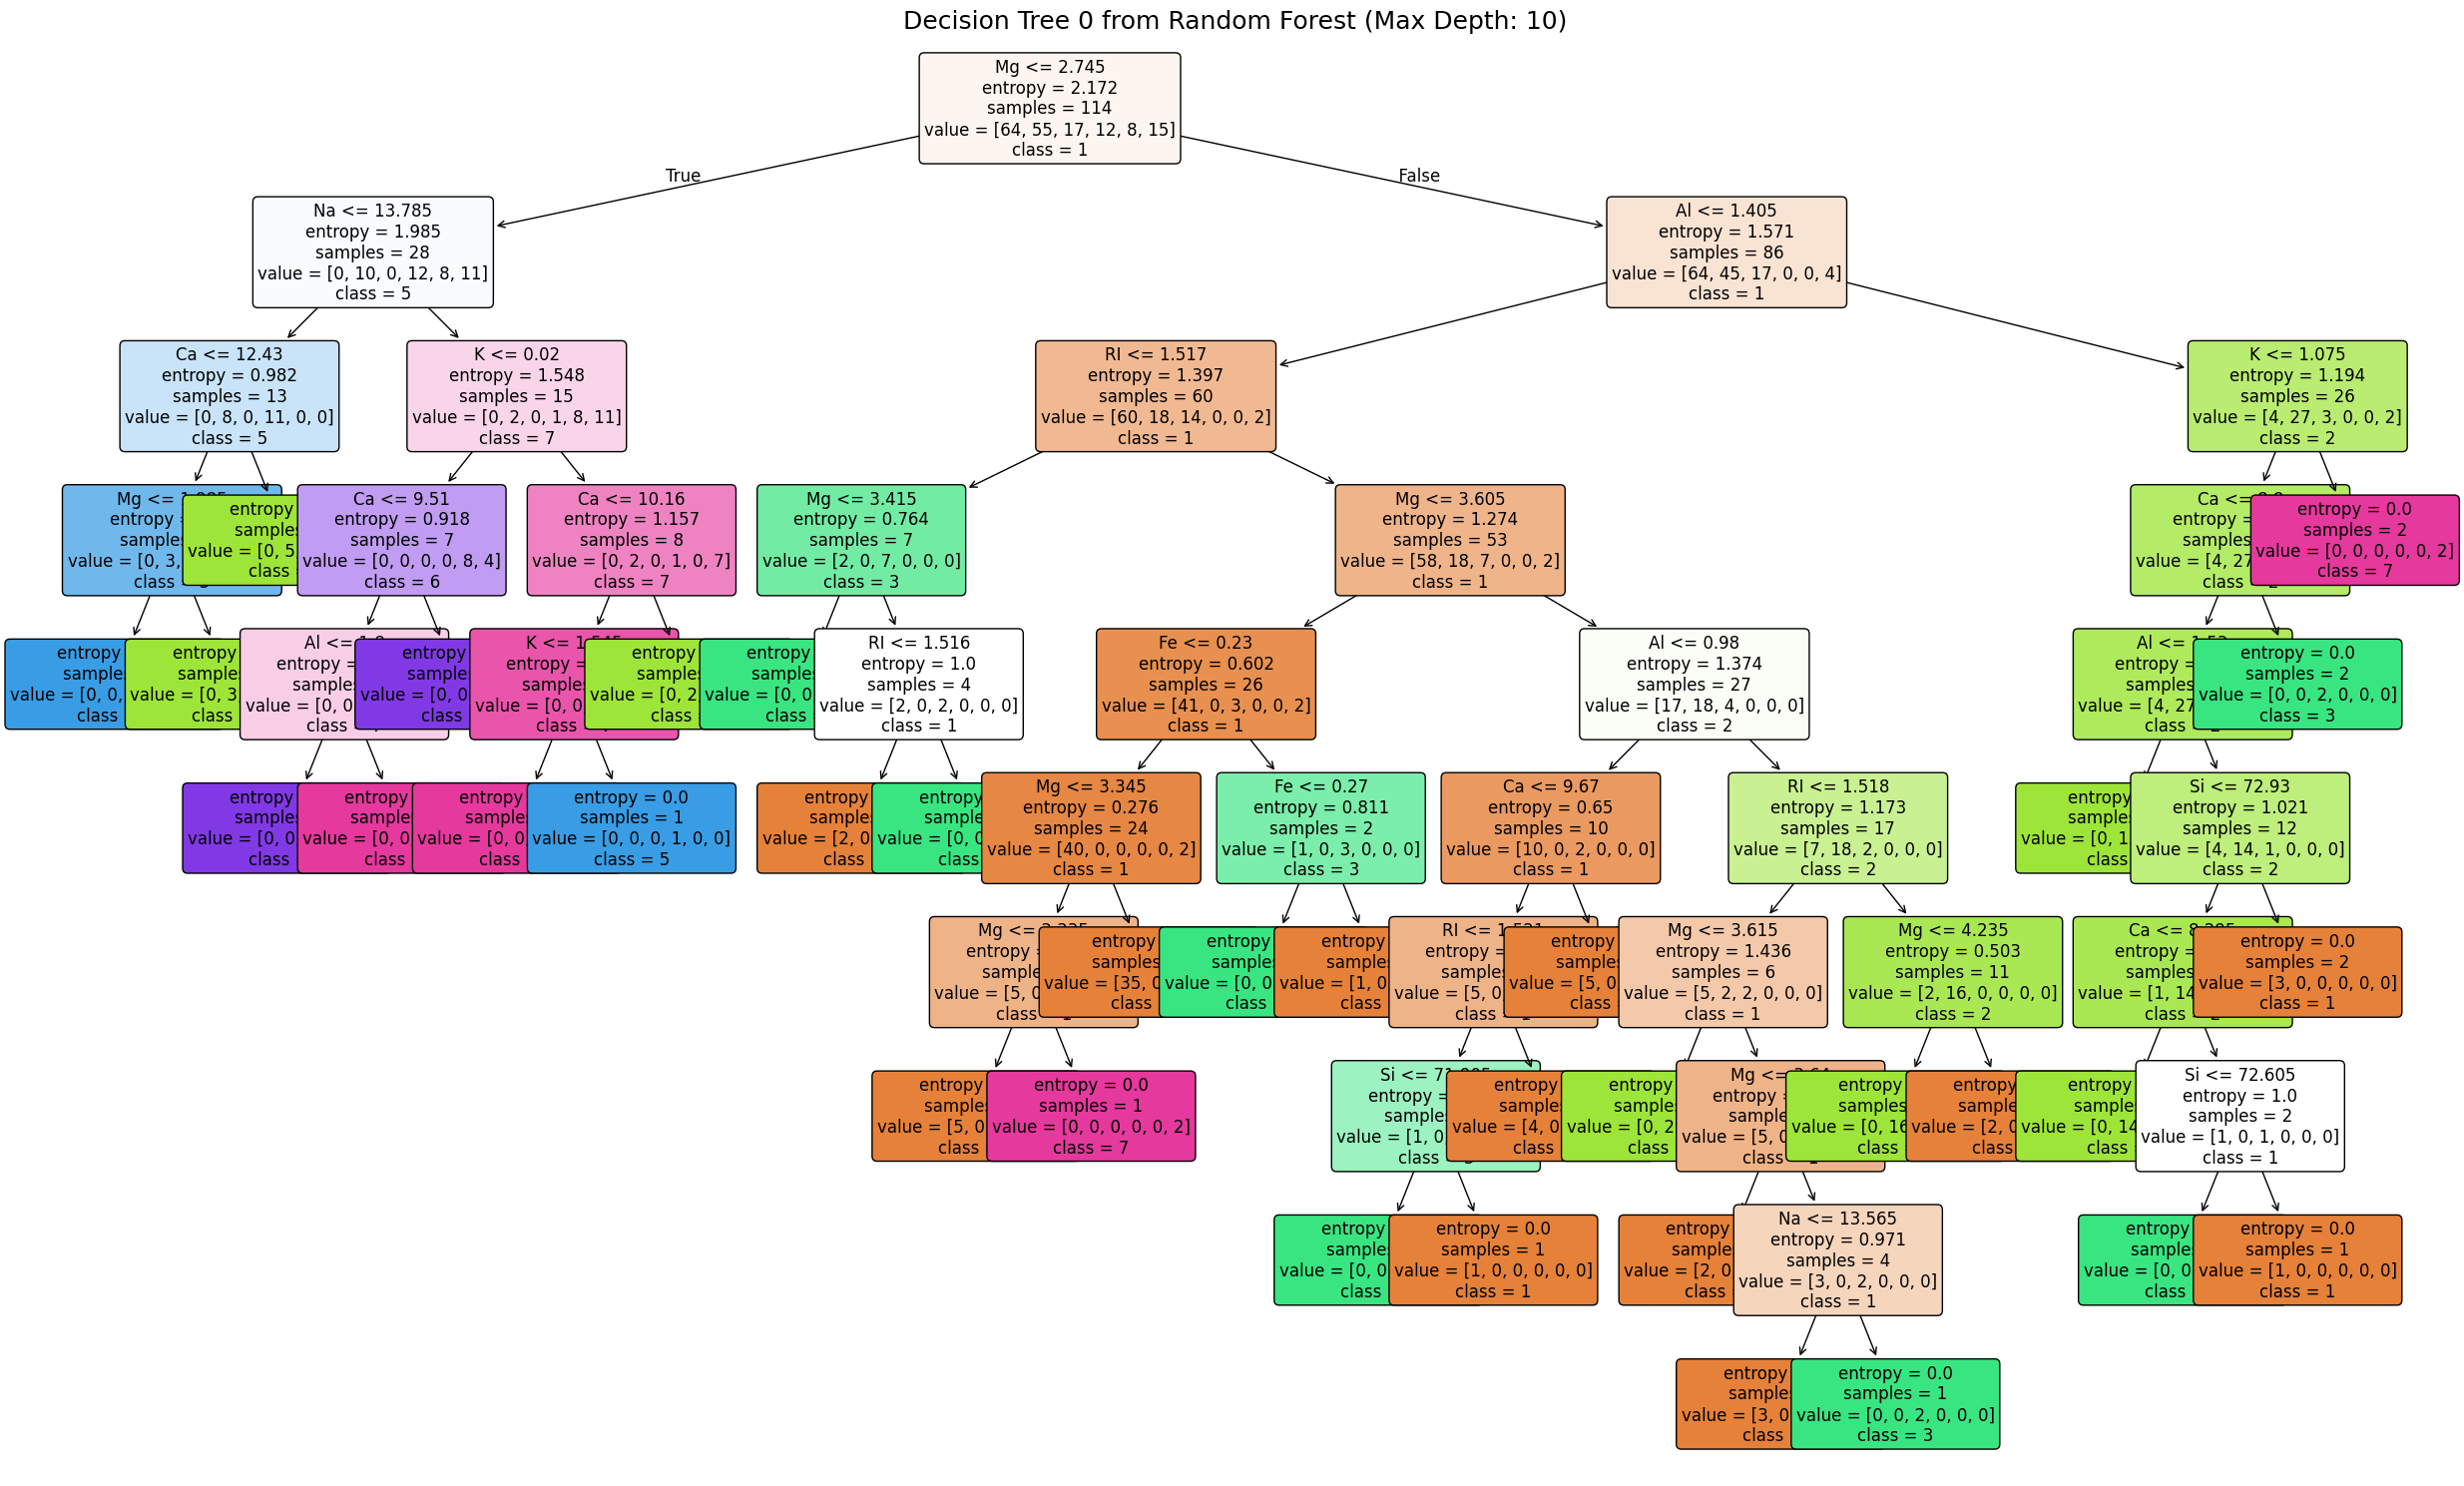

In [55]:
plot_decision_tree(model= best_model,
                   feature_names= X.columns,
                   class_names= class_names, max_depth= best_params['max_depth'])

### Best model evaluation

In [50]:
Best_model_metrics , Best_model_report = evaluate_model(model= best_model,
               X_test= X_test,
               y_test= y_test)

In [51]:
Best_model_metrics

{'Accuracy': 0.8372093023255814,
 'Precision': 0.8505267342476643,
 'Recall': 0.8372093023255814,
 'F1 Score': 0.8316917464660283}

In [52]:
print(Best_model_report)

              precision    recall  f1-score   support

           1       0.77      0.91      0.83        11
           2       0.79      0.79      0.79        14
           3       1.00      0.67      0.80         3
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.81      0.84        43
weighted avg       0.85      0.84      0.83        43



### Model without tunning

In [47]:
metrics

{'Accuracy': 0.8372093023255814,
 'Precision': 0.866828165374677,
 'Recall': 0.8372093023255814,
 'F1 Score': 0.8330452594474481}

In [48]:
print(report)

              precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.90      0.64      0.75        14
           3       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.84      0.86        43
weighted avg       0.87      0.84      0.83        43



### Bagging and Boosting

In [56]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [59]:
def train_bagging(X_train, y_train, estimator=None, n_estimators=50, random_state=42):
    """
    Train a Bagging Classifier with a specified base estimator.
    
    Parameters:
    - X_train: Training features
    - y_train: Training labels
    - base_estimator: Base model to use (e.g., DecisionTreeClassifier), defaults to None (uses Decision Trees)
    - n_estimators: Number of base estimators in the ensemble
    - random_state: Random state for reproducibility
    
    Returns:
    - bagging_model: Trained Bagging model
    """
    bagging_model = BaggingClassifier(estimator=estimator, n_estimators=n_estimators, random_state=random_state)
    bagging_model.fit(X_train, y_train)
    return bagging_model

In [60]:
bagging_model = train_bagging(X_train= X_train,
                              y_train= y_train)

In [61]:
bagging_model

BaggingClassifier(n_estimators=50, random_state=42)

In [62]:
def train_boosting(X_train, y_train, method='adaboost', n_estimators=50, learning_rate=1.0, random_state=42):
    """
    Train a Boosting Classifier using AdaBoost or Gradient Boosting.
    
    Parameters:
    - X_train: Training features
    - y_train: Training labels
    - method: 'adaboost' or 'gradientboost' for AdaBoost or Gradient Boosting
    - n_estimators: Number of estimators in the ensemble
    - learning_rate: Learning rate for boosting algorithms
    - random_state: Random state for reproducibility
    
    Returns:
    - boosting_model: Trained Boosting model
    """
    if method == 'adaboost':
        boosting_model = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=random_state)
    elif method == 'gradientboost':
        boosting_model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=random_state)
    else:
        raise ValueError("Invalid method. Choose 'adaboost' or 'gradientboost'.")
    
    boosting_model.fit(X_train, y_train)
    return boosting_model


### ADA Boost

In [74]:
Ada_boosting_model = train_boosting(X_train=X_train,
                                y_train= y_train)


In [75]:
Ada_boosting_model

AdaBoostClassifier(random_state=42)

### GradientBoost

In [79]:
Gra_boost_model = train_boosting(X_train=X_train,
                                y_train= y_train,
                                method= 'gradientboost')

In [80]:
Gra_boost_model

GradientBoostingClassifier(learning_rate=1.0, n_estimators=50, random_state=42)

### Bagging Model Evaluation

In [66]:
bagging_metrics , bagging_report = evaluate_model(model= bagging_model,
               X_test= X_test,
               y_test= y_test)

In [67]:
bagging_metrics

{'Accuracy': 0.8604651162790697,
 'Precision': 0.8673009161381255,
 'Recall': 0.8604651162790697,
 'F1 Score': 0.8536672629695886}

In [68]:
print(bagging_report)

              precision    recall  f1-score   support

           1       0.73      1.00      0.85        11
           2       0.91      0.71      0.80        14
           3       0.50      0.33      0.40         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8

    accuracy                           0.86        43
   macro avg       0.86      0.84      0.84        43
weighted avg       0.87      0.86      0.85        43



### Ada Boosting Model Evaluation

In [76]:
Ada_boosting_metrics , Ada_boosting_report = evaluate_model(model= Ada_boosting_model,
               X_test= X_test,
               y_test= y_test)

In [77]:
Ada_boosting_metrics

{'Accuracy': 0.5348837209302325,
 'Precision': 0.45028003412336337,
 'Recall': 0.5348837209302325,
 'F1 Score': 0.47239610654543335}

In [78]:
print(Ada_boosting_report)

              precision    recall  f1-score   support

           1       0.47      0.82      0.60        11
           2       0.50      0.36      0.42        14
           3       0.00      0.00      0.00         3
           5       0.33      0.25      0.29         4
           6       0.00      0.00      0.00         3
           7       0.73      1.00      0.84         8

    accuracy                           0.53        43
   macro avg       0.34      0.40      0.36        43
weighted avg       0.45      0.53      0.47        43



### Gradient Boosting Model Evaluation

In [81]:
Gra_boosting_metrics , Gra_boosting_report = evaluate_model(model= Gra_boost_model,
               X_test= X_test,
               y_test= y_test)

In [82]:
Gra_boosting_metrics

{'Accuracy': 0.7906976744186046,
 'Precision': 0.8100402504472273,
 'Recall': 0.7906976744186046,
 'F1 Score': 0.7867109634551496}

In [83]:
print(Gra_boosting_report)

              precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.77      0.71      0.74        14
           3       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       0.50      0.33      0.40         3
           7       1.00      0.88      0.93         8

    accuracy                           0.79        43
   macro avg       0.83      0.72      0.76        43
weighted avg       0.81      0.79      0.79        43



# Comparison of Bagging, AdaBoost, and Gradient Boosting Models

## 1. **Bagging Model**
- **Accuracy**: 86.05%
- **Precision**: 86.73%
- **Recall**: 86.05%
- **F1 Score**: 85.37%

**Performance Insight**:  
The Bagging model performs exceptionally well, achieving the highest accuracy and balanced precision, recall, and F1 score. This suggests that Bagging is effective in reducing variance and creating a stable model with strong generalization.

---

## 2. **AdaBoost Model**
- **Accuracy**: 53.49%
- **Precision**: 45.03%
- **Recall**: 53.49%
- **F1 Score**: 47.24%

**Performance Insight**:  
The AdaBoost model significantly underperforms compared to the other models. Low precision and F1 scores indicate that the model struggles with classification and may be sensitive to noise or imbalanced data. Fine-tuning the `n_estimators` or `learning_rate` could improve its performance.

---

## 3. **Gradient Boosting Model**
- **Accuracy**: 79.07%
- **Precision**: 81.00%
- **Recall**: 79.07%
- **F1 Score**: 78.67%

**Performance Insight**:  
Gradient Boosting performs well but slightly below Bagging. It balances precision and recall effectively, indicating that it captures patterns in the data while avoiding overfitting. Gradient Boosting is generally robust when fine-tuned further.

---

## **Overall Comparison**

| Model                | Accuracy (%) | Precision (%) | Recall (%) | F1 Score (%) |
|----------------------|--------------|---------------|------------|--------------|
| **Bagging**          | **86.05**    | **86.73**     | **86.05**  | **85.37**    |
| **AdaBoost**         | 53.49        | 45.03         | 53.49      | 47.24        |
| **Gradient Boosting**| 79.07        | 81.00         | 79.07      | 78.67        |

---

## **Key Observations**
1. **Bagging Model**:
   - Demonstrates superior performance, making it the best choice for this dataset.
   - It reduces variance effectively and provides consistent predictions.

2. **AdaBoost Model**:
   - Performs poorly, indicating potential issues such as sensitivity to noise or misclassified data points.
   - Fine-tuning hyperparameters may help improve its performance.

3. **Gradient Boosting Model**:
   - Achieves competitive performance with a good balance between accuracy, precision, recall, and F1 score.
   - Slightly less effective than Bagging but still a strong model for the given dataset.

---

## **Recommendation**
- **Bagging** is the best choice for this dataset due to its stability and high performance. 
- For AdaBoost, revisit the data preprocessing (e.g., addressing noise or class imbalance) and hyperparameter tuning to improve results. 
- **Gradient Boosting** is a solid alternative, particularly if further tuning is applied to improve accuracy and generalization.
